In [20]:
# Check if this code runs in Colab
RunningInCOLAB = 'google.colab' in str(get_ipython())

# To prevent that some version of matplolib causes an openmp error
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [21]:
# Environment Setup
# Depending on the execution environment (Colab), it sets the environment variable RunningInCOLAB's packages
if RunningInCOLAB:  # if the envionment is set, installs specific packages (gymnasium, pygame, moviepy)
    !pip install gymnasium
    !pip install pygame
    !pip install 'moviepy>=1.0.3'
    from tqdm.notebook import tqdm
else: # if the envionment is not set
    from tqdm import tqdm

In [22]:
# Importing Libraries (It imports necessary libraries such as numpy, matplotlib.pyplot, and gym.)
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
from gymnasium import wrappers

In [23]:
# import the libraries(by using gym.)
gym.__version__

'0.29.1'

In [24]:
# select evironment
# Text Game:    0 for FrozenLake 4x4, 1 for Taxi, 2 for Blackjack

SELECT_ENV = 1 # initialize the variable.

In [25]:
# Define the variable according to the condition and also define the associated function.
# It selects a Gym environment based on the SELECT_ENV variable, defining specific parameters for different environments like 'FrozenLake-v1', 'Taxi-v3', or 'Blackjack-v1'.
if SELECT_ENV == 0:
    env_name, res_prefix = 'FrozenLake-v1', 'lak4'
    max_episodes, max_ep_steps, goal_score = 500, 500, 0.8
elif SELECT_ENV == 1:
    env_name, res_prefix = 'Taxi-v3', 'taxi'
    max_episodes, max_ep_steps, goal_score = 500, 500, 8.0
elif SELECT_ENV == 2:
    env_name, res_prefix = 'Blackjack-v1', 'blkj'
    max_episodes, max_ep_steps, goal_score = 500, 500, 1.0
else: assert False, 'environment selection error'
# The create_env() function creates and configures the selected Gym environment based on the chosen parameters.
def create_env():
    if   SELECT_ENV == 0: # Forzen Lake
        env = gym.make(env_name, desc=None, map_name='4x4', is_slippery=True, render_mode='rgb_array')
    elif   SELECT_ENV == 1: # Taxi
        env = gym.make(env_name, render_mode='rgb_array')
    elif   SELECT_ENV == 2: # Blackjack
        env = gym.make(env_name, natural=False, sab=False, render_mode='rgb_array')
    else: pass
    return env

In [26]:
# Defines the functions associated with the environment setup.
def env_reset(env):
  # Resets the environment and returns the initial state representation
    observation = env.reset()
    obs = observation[0] if type(observation)==tuple else observation
    if SELECT_ENV == 2:
        state = obs[0] + 32 * obs[2] + 64 * obs[1]
    else: state = obs
    return state

def env_step(env, action):
  # Executes an action in the environment and returns the updated state, reward, and done flag
    observation = env.step(action)
    if SELECT_ENV == 2:
        state = observation[0][0] + 32 * observation[0][2] + 64 * observation[0][1]
    else: state = observation[0]
    reward = observation[1]
    done = observation[2] or observation[3] if len(observation)>4 else observation[2]
    return state, reward, done

In [27]:
# Create the environment
env = create_env()
# Reset the environment to get the initial state
state = env_reset(env)
# Perform an action in the environment to get a new state, reward, and done flag
state, reward, done = env_step(env, env.action_space.sample())

In [28]:
# Analyze the action space properties
action_shape = env.action_space.shape
action_space_type = type(env.action_space)
# Check and define properties based on the action space type (Discrete or Box)
if action_space_type==gym.spaces.discrete.Discrete:
    # For Discrete action space
    actn_space = 'DISCRETE'
    action_shape = (1,)
    action_dims = 1
    action_range = env.action_space.n
    num_actions = action_range  # number of actions is action range for DISCRETE actions
    action_batch_shape = (None, action_range)
elif action_space_type==gym.spaces.box.Box:
    # For Continuous action space
    actn_space = 'CONTINUOUS'
    action_dims = action_shape[0]
    actn_uppr_bound = env.action_space.high[0]
    actn_lowr_bound = env.action_space.low[0]
    action_range = (actn_uppr_bound - actn_lowr_bound) # x0.5 for tanh output
    action_batch_shape = tuple([None]+[x for x in action_shape])
    num_actions = action_dims   # number of actions is action dimension for CONTINUOUS actions
else: assert False, 'other action space type are not supported'

# Analyze the observation space properties
observation_space_type = type(env.observation_space)
observation_shape = env.observation_space.shape

# Check and define properties based on the observation space type
if observation_space_type==gym.spaces.discrete.Discrete:
    observation_shape = (1,)
    num_states = env.observation_space.n
elif observation_space_type==gym.spaces.box.Box:
    num_states = observation_shape[0]
elif observation_space_type==gym.spaces.tuple.Tuple:
    observation_shape = tuple([x.n for x in env.observation_space])
    num_states = np.prod(observation_shape)
else: print('observation space type error')

# Define the state shape and batch shape based on the selected environment
if SELECT_ENV == 2:
    state_shape = (1,)
    state_batch_shape = (None,1)
else:
    state_shape = observation_shape
    state_batch_shape = tuple([None]+[x for x in observation_shape])

# Define the shape and number of values related to the environment state
value_shape = (1,)
num_values = 1

In [29]:
# print out the information.
print('Action space ', action_space_type)
print('Action shape ', action_shape)
print('Action dimensions ', action_dims)
print('Action range ', action_range)
if action_space_type==gym.spaces.box.Box:
    print('Max Value of Action ', actn_uppr_bound)
    print('Min Value of Action ', actn_lowr_bound)
else: pass
print('Action batch shape ', action_batch_shape)

print('Observation space ', observation_space_type)
print('Observation shape ', observation_shape)
print('Size of State Space ', num_states)
print('State shape ', state_shape)
print('State batch shape ', state_batch_shape)

print('Vallue shape ', value_shape)
print('Value dimensions ', num_values)

Action space  <class 'gymnasium.spaces.discrete.Discrete'>
Action shape  (1,)
Action dimensions  1
Action range  6
Action batch shape  (None, 6)
Observation space  <class 'gymnasium.spaces.discrete.Discrete'>
Observation shape  (1,)
Size of State Space  500
State shape  (1,)
State batch shape  (None, 1)
Vallue shape  (1,)
Value dimensions  1


In [30]:
# define q-table
### START CODE HERE ###
# the number of states is 500, and the number of actions is 6
Q_table = np.zeros((num_states,action_range))                          # define q-table

###  END CODE HERE  ###

print(Q_table.shape)  # print out the Q_table's shape

(500, 6)


In [31]:
# define the variables.
total_episodes = 2000           # Total episodes
learning_rate = 0.8             # Learning rate
max_steps = 99                  # Max steps per episode
gamma = 0.95                    # Discounting rate
val_episodes = 20               # number of validation episodes

In [32]:
# defines a class called Epsilon and also defines the variables and functions of the class.
class Epsilon:
    def __init__(self, max_steps):
        self.explore_start = 1.0            # exploration probability at start
        self.explore_stop = 0.01            # minimum exploration probability
        self.decay_rate = 20.0/max_steps    # exponential decay rate for exploration prob (4.6 ~ max_step = 0.01)
        self.steps = 0
# update and redefine the variable.
    def get_epsilon(self):
        eps = (self.explore_stop
            + (self.explore_start - self.explore_stop) * np.exp(-self.decay_rate * self.steps))
        self.steps += 1
        return eps

In [33]:
# Function to evaluate the policy using the Q-table
def evaluate_policy(env, qtable, num_average):

    total_reward = 0.0
    episodes_to_play = num_average
    for _ in range(episodes_to_play):               # Play n episode and take the average
        state = env_reset(env)
        done = False
        episode_reward = 0.0
        while not done:

            ### START CODE HERE ###
            # Choose action using the Q-table
            action = np.argmax(qtable[state, :])    # get an action from q-table
            next_state, reward, done = env_step(env, action)  # take action and observe outcomes

            ###  END CODE HERE  ###

            state = next_state                      # update state
            episode_reward += reward
        total_reward += episode_reward
    average_reward = total_reward / episodes_to_play # take the average reward of evaluations

    return average_reward

In [34]:
history = {'rewards': []}                          # logs of rewards
epsF = Epsilon(total_episodes)                      # generate epsilon object

# tqdm creates a progress bar to visualize the training progress
pbar = tqdm(range(total_episodes), bar_format='{l_bar}{bar:10}{r_bar}{bar:-10b}')

for episodes in pbar:

    # initialize variables for a new episode
    epis_rewards = 0                                # episode reward
    epis_steps = 0                                  # steps for an episode

    state = env_reset(env)                          # Reset the environment
    done = False                                    # episode end flag

    epsilon = epsF.get_epsilon()                    # get new epsilon value

    while not done:
        ### START CODE HERE ###
        explore_prob = np.random.uniform(0, 1)                 # get a random number for exploration decision
        if explore_prob > epsilon:                             # exploitation
            action = np.argmax(Q_table[state, :])              # exploit by selecting action with highest Q-value
        else:                                                  # exploration
            action = np.random.randint(0, action_range)        # explore by choosing a random action

        next_state, reward, done = env_step(env, action)       # take the action and observe outcomes

        # Update Q-table based on Q-learning algorithm
        Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + learning_rate * (reward + gamma * np.max(Q_table[next_state, :]))

        ###  END CODE HERE  ###

        epis_rewards += reward                                 # accumulate rewards for the episode
        state = next_state                                     # update state for the next step

        if epis_steps > max_steps:
            break  # If the episode runs too long, terminate it
        else:
            epis_steps += 1

    history['rewards'].append(epis_rewards)   # Store episode rewards in history

    pbar.set_postfix({'reward': epis_rewards, 'steps': epis_steps})  # Update progress bar with reward and steps

    eval_reward = evaluate_policy(env, Q_table, val_episodes)   # evaluate the policy over validation episodes

    if eval_reward > goal_score:
        break  # Exit loop if the goal score is achieved

# Output the final number of episodes and the achieved final reward
print('episodes:{0:5d}, final_reward {1:4.2f}'.format(episodes + 1, eval_reward))



  0%|          | 0/2000 [00:00<?, ?it/s]

episodes:  658, final_reward 8.65


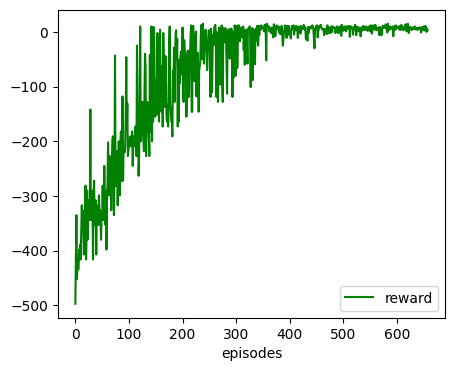

In [35]:
# plot loss and accuracy
def plot_graphs(log_history, log_labels, graph_labels, graph_colors=['b-','g-']):
    num_graphs = len(log_labels)  # Number of graphs to plot
    plt.figure(figsize=(5*num_graphs,4))  # Set the figure size based on the number of graphs
    # Iterate over the number of graphs to plot
    for i in range(num_graphs):
        plt.subplot(1,num_graphs,i+1) # Create subplots for each graph
        plt.plot(log_history[log_labels[i]], graph_colors[i], label=graph_labels[i])  # Plot the data
        plt.xlabel('episodes')  # Set x-axis label
        plt.legend()  # Display legend for the graph
    plt.show()  # Display the plotted graphs
    return

log_labels    = ['rewards']  # Labels for the logged data (e.g., rewards, losses, etc.)
label_strings = ['reward']  # Labels for the graphs (e.g., 'Reward')
label_colors  = ['g-']  # Colors for the plotted lines on the graph

# Plot the graphs using the defined function and provided parameters
plot_graphs(history, log_labels, label_strings, label_colors)

In [36]:
# set the parameters
evaluate_episodes = 20  # Number of episodes for evaluation
sum_episode_rewards = 0.0  # Initialize the sum of episode rewards

# tqdm creates a progress bar to visualize the evaluation progress
pbar = tqdm(range(evaluate_episodes))

# Loop through the defined number of evaluation episodes
for i in pbar:
    # Evaluate the policy over one episode and accumulate the reward
    sum_episode_rewards += evaluate_policy(env, Q_table, 1)
# Calculate and output the average evaluation result over all episodes
print('Evaluation Result:',  sum_episode_rewards/evaluate_episodes)

  0%|          | 0/20 [00:00<?, ?it/s]

Evaluation Result: -13.85


In [37]:
# Create a new environment and record a video of the agent's behavior

# Close the current environment
env.close()

# Create a new environment and record a video of the agent's behavior
env = create_env()  # Create the environment again
env = wrappers.RecordVideo(env, video_folder='./gym-results/', name_prefix=res_prefix)

# Evaluate the policy over one episode and get the total reward achieved
eval_reward = evaluate_policy(env, Q_table, 1)

# Output the total reward achieved in the sample evaluation episode
print('Sample Total Reward:', eval_reward)

# Close the environment after recording the video
env.close()

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/gym-results folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/gym-results/taxi-episode-0.mp4.
Moviepy - Writing video /content/gym-results/taxi-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/gym-results/taxi-episode-0.mp4
Sample Total Reward: 8.0


In [38]:
# play the generated video.
from IPython.display import HTML  # Importing necessary modules for displaying HTML content
from base64 import b64encode  # Module to encode video file into base64

# Function to display a video file in the Jupyter Notebook
def show_video(video_path, video_width = 320):
  # Read the video file and encode it into base64
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  # Return HTML code to display the video with the specified width and controls for playback
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

# Display the video located at the specified path
show_video('./gym-results/' + res_prefix + '-episode-0.mp4')